In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
from scipy.optimize import root
from functools import partial
import math
# Davide was here

# Homework CNS Week 2
## Stefan Iacob (s4575121), Bas Krahmer (s4616553), Davide Sabeddu (s1032453)

## Assignment 1
### a)


### b)
<img src="2_1b-1.jpg">

### c)

## Assignment 2
### a)

### b)

## Assignment 3

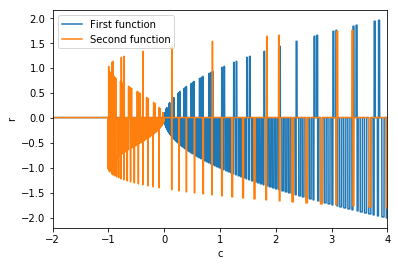

In [64]:
def plot_radius(r_prime, plot_title, theta_prime=2*math.pi):
    c_vals = np.linspace(-6.0, 6.0, 12000)
    r_vals = np.linspace(-2.0, 2.0, 200)
    steady_state_solutions = []
    
    # For all C values
    for c in c_vals:
        r_prime_vals = r_prime(r_vals, c)

        # Find the value where the derivative of r is closest to 0
        solution_index = np.where(r_prime_vals == min(r_prime_vals, key=lambda x:abs(x)))
        solution = r_vals[solution_index]

        steady_state_solutions.append(solution)
        
    plt.plot(c_vals, steady_state_solutions, label=plot_title)
    plt.xlabel('c')
    plt.ylabel('r')
    plt.xlim(-2, 4)
    plt.legend()
    
    return plt


def r_prime1(r, c):
    return r*(c - r**2)

def r_prime2(r, c):
    return r*(c + 2*r**2 - r**4)

plot_radius(r_prime1, 'First function')
plot_radius(r_prime2, 'Second function')
plt.show()